In [45]:
# importing files and dataset

import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, roc_auc_score, log_loss,r2_score


import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3


In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_daaf88ce26054750a4caada465a07407 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_daaf88ce26054750a4caada465a07407 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_daaf88ce26054750a4caada465a07407 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JBjekjXRa4hzxEz41CG6pds2dK8coQgy-8he3xg44nzz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_daaf88ce26054750a4caada465a07407)

body = client_daaf88ce26054750a4caada465a07407.get_object(Bucket='studentsx27gradesprediction-donotdelete-pr-jpacdhnzkmitwa',Key='result.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

In [3]:
data.rename(columns = {'First Class':'Cat 1', "Second Class":'Cat 2', 'Pass': 'Overall','Pstatus': 'Parents_status'}, inplace = True)
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Parents_status,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,Cat 1,Cat 2,Overall
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# View the structure of the dataset
data.shape

(1044, 34)

In [5]:
# Drop column 1, address, reason, Dalc, Walc, famrel
data = data.drop(['Unnamed: 0','address', 'reason', 'Dalc', 'Walc','famrel'], axis=1)
data.head()

,school,sex,age,famsize,Parents_status,Medu,Fedu,Mjob,Fjob,guardian,...,higher,internet,romantic,freetime,goout,health,absences,Cat 1,Cat 2,Overall
0,GP,F,18,GT3,A,4,4,at_home,teacher,mother,...,yes,no,no,3,4,3,6,5,6,6
1,GP,F,17,GT3,T,1,1,at_home,other,father,...,yes,yes,no,3,3,3,4,5,5,6
2,GP,F,15,LE3,T,1,1,at_home,other,mother,...,yes,yes,no,3,2,3,10,7,8,10
3,GP,F,15,GT3,T,4,2,health,services,mother,...,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,GT3,T,3,3,other,other,father,...,yes,no,no,3,2,5,4,6,10,10


In [6]:
# Check the data types of the columns available.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          1044 non-null   object
 1   sex             1044 non-null   object
 2   age             1044 non-null   int64 
 3   famsize         1044 non-null   object
 4   Parents_status  1044 non-null   object
 5   Medu            1044 non-null   int64 
 6   Fedu            1044 non-null   int64 
 7   Mjob            1044 non-null   object
 8   Fjob            1044 non-null   object
 9   guardian        1044 non-null   object
 10  traveltime      1044 non-null   int64 
 11  studytime       1044 non-null   int64 
 12  failures        1044 non-null   int64 
 13  schoolsup       1044 non-null   object
 14  famsup          1044 non-null   object
 15  paid            1044 non-null   object
 16  activities      1044 non-null   object
 17  nursery         1044 non-null   object
 18  higher  

In [7]:
# Check for missing/null values
data.isnull().any()

school            False
sex               False
age               False
famsize           False
Parents_status    False
Medu              False
Fedu              False
Mjob              False
Fjob              False
guardian          False
traveltime        False
studytime         False
failures          False
schoolsup         False
famsup            False
paid              False
activities        False
nursery           False
higher            False
internet          False
romantic          False
freetime          False
goout             False
health            False
absences          False
Cat 1             False
Cat 2             False
Overall           False
dtype: bool

In [8]:
data.school.value_counts()

GP    772
MS    272
Name: school, dtype: int64

In [9]:
#school
data.loc[data['school']=='GP','school'] = 'COHRED'
data.loc[data['school']=='MS','school'] = 'COPAS'

In [10]:
data.school.value_counts()

COHRED    772
COPAS     272
Name: school, dtype: int64

In [11]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,Cat 1,Cat 2,Overall
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.201149,3.156130,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,1.031507,1.152575,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
# Check Correlation
data_corr = data.corr()
data_corr

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,Cat 1,Cat 2,Overall
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.002645,0.118510,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.001054,0.025614,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.002142,0.030075,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.007403,0.049740,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,-0.094429,-0.072941,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,0.102679,0.074683,0.048311,0.099998,-0.374175,-0.377172,-0.383145
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,1.000000,0.323556,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.323556,1.000000,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
health,-0.029129,-0.013254,0.034288,-0.029002,-0.063044,0.048311,0.081517,-0.013736,1.000000,-0.027479,-0.060478,-0.088001,-0.080079
absences,0.153196,0.059708,0.040829,-0.022669,-0.075594,0.099998,-0.032079,0.056142,-0.027479,1.000000,-0.092425,-0.089332,-0.045671


<AxesSubplot:>

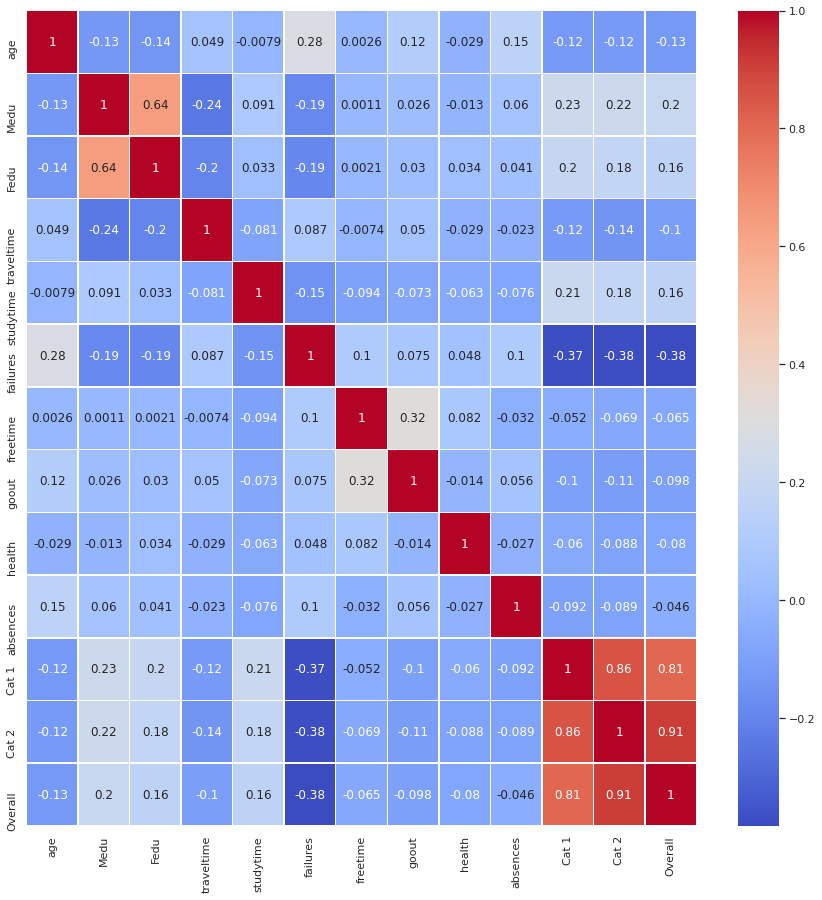

In [13]:
# Visualize correlation using seaborn

sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(data = data_corr,  linewidths=.5, cmap = 'coolwarm', annot = True)

In [14]:
# data preprocessing

#school
data.loc[data['school']=='COHRED','school'] = 0
data.loc[data['school']=='COPAS','school'] = 1
print('school: ',data.school.unique(),' -> ',data.school.unique())

#sex
data.loc[data['sex']=='F','sex'] = 0
data.loc[data['sex']=='M','sex'] = 1
print('sex: ',data.sex.unique(),' -> ',data.sex.unique())

#family size 
data.loc[data['famsize']=='LE3','famsize'] = 0
data.loc[data['famsize']=='GT3','famsize'] = 1
print('famsize: ',data.famsize.unique(),' -> ',data.famsize.unique())

#parent's cohabitaiion
data.loc[data['Parents_status']=='A','Parents_status'] = 0
data.loc[data['Parents_status']=='T','Parents_status'] = 1
print('Pstatus: ',data.Parents_status.unique(),' -> ',data.Parents_status.unique())

#mother's job
data.loc[data['Mjob']=='at_home','Mjob'] = 0
data.loc[data['Mjob']=='teacher','Mjob'] = 1
data.loc[data['Mjob']=='health','Mjob'] = 2
data.loc[data['Mjob']=='services','Mjob'] = 3
data.loc[data['Mjob']=='other','Mjob'] = 4
print('Mjob: ',data.Mjob.unique(),' -> ',data.Mjob.unique())

#father's job
data.loc[data['Fjob']=='at_home','Fjob'] = 0
data.loc[data['Fjob']=='teacher','Fjob'] = 1
data.loc[data['Fjob']=='health','Fjob'] = 2
data.loc[data['Fjob']=='services','Fjob'] = 3
data.loc[data['Fjob']=='other','Fjob'] = 4
print('Mjob: ',data.Fjob.unique(),' -> ',data.Fjob.unique())

#guardian
data.loc[data['guardian']=='mother','guardian'] = 0
data.loc[data['guardian']=='father','guardian'] = 1
data.loc[data['guardian']=='other','guardian'] = 2
print('guardian: ',data.guardian.unique(),' -> ',data.guardian.unique())

#school support
data.loc[data['schoolsup']=='no','schoolsup'] = 0
data.loc[data['schoolsup']=='yes','schoolsup'] = 1
print('schoolsup: ',data.schoolsup.unique(),' -> ',data.schoolsup.unique())

#family support
data.loc[data['famsup']=='no','famsup'] = 0
data.loc[data['famsup']=='yes','famsup'] = 1
print('famsup: ',data.famsup.unique(),' -> ',data.famsup.unique())

#paid
data.loc[data['paid']=='no','paid'] = 0
data.loc[data['paid']=='yes','paid'] = 1
print('paid: ',data.paid.unique(),' -> ',data.paid.unique())

#activities
data.loc[data['activities']=='no','activities'] = 0
data.loc[data['activities']=='yes','activities'] = 1
print('activities: ',data.activities.unique(),' -> ',data.activities.unique())

#nursery
data.loc[data['nursery']=='no','nursery'] = 0
data.loc[data['nursery']=='yes','nursery'] = 1
print('nursery: ',data.nursery.unique(),' -> ',data.nursery.unique())

#higher edu
data.loc[data['higher']=='no','higher'] = 0
data.loc[data['higher']=='yes','higher'] = 1
print('higher: ',data.higher.unique(),' -> ',data.higher.unique())

#internet 
data.loc[data['internet']=='no','internet'] = 0
data.loc[data['internet']=='yes','internet'] = 1
print('internet: ',data.internet.unique(),' -> ',data.internet.unique())

#romantic 
data.loc[data['romantic']=='no','romantic'] = 0
data.loc[data['romantic']=='yes','romantic'] = 1
print('romantic: ',data.romantic.unique(),' -> ',data.romantic.unique())


school:  [0 1]  ->  [0 1]
sex:  [0 1]  ->  [0 1]
famsize:  [1 0]  ->  [1 0]
Pstatus:  [0 1]  ->  [0 1]
Mjob:  [0 2 4 3 1]  ->  [0 2 4 3 1]
Mjob:  [1 4 3 2 0]  ->  [1 4 3 2 0]
guardian:  [0 1 2]  ->  [0 1 2]
schoolsup:  [1 0]  ->  [1 0]
famsup:  [0 1]  ->  [0 1]
paid:  [0 1]  ->  [0 1]
activities:  [0 1]  ->  [0 1]
nursery:  [1 0]  ->  [1 0]
higher:  [1 0]  ->  [1 0]
internet:  [0 1]  ->  [0 1]
romantic:  [0 1]  ->  [0 1]


In [15]:
data.head()

,school,sex,age,famsize,Parents_status,Medu,Fedu,Mjob,Fjob,guardian,...,higher,internet,romantic,freetime,goout,health,absences,Cat 1,Cat 2,Overall
0,0,0,18,1,0,4,4,0,1,0,...,1,0,0,3,4,3,6,5,6,6
1,0,0,17,1,1,1,1,0,4,1,...,1,1,0,3,3,3,4,5,5,6
2,0,0,15,0,1,1,1,0,4,0,...,1,1,0,3,2,3,10,7,8,10
3,0,0,15,1,1,4,2,2,3,0,...,1,1,1,2,2,5,2,15,14,15
4,0,0,16,1,1,3,3,4,4,1,...,1,0,0,3,2,5,4,6,10,10


In [16]:
data.columns

Index(['school', 'sex', 'age', 'famsize', 'Parents_status', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'freetime', 'goout', 'health', 'absences',
       'Cat 1', 'Cat 2', 'Overall'],
      dtype='object')

In [17]:
X = data.drop('Overall', axis=1)
y = data['Overall'].values

In [18]:
data_column_names = X.columns
data_column_names

Index(['school', 'sex', 'age', 'famsize', 'Parents_status', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'freetime', 'goout', 'health', 'absences',
       'Cat 1', 'Cat 2'],
      dtype='object')

In [19]:
# Scaling the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled = pd.DataFrame(X_scaled, columns = data_column_names)
X_scaled.head()

,school,sex,age,famsize,Parents_status,Medu,Fedu,Mjob,Fjob,guardian,...,nursery,higher,internet,romantic,freetime,goout,health,absences,Cat 1,Cat 2
0,-0.593575,-0.875498,1.027889,0.643921,-2.761901,1.242077,1.466302,-1.619210,-1.919221,-0.609587,...,0.500299,0.305276,-1.952194,-0.742471,-0.195099,0.732511,-0.381387,0.252155,-2.083727,-1.597738
1,-0.593575,-0.875498,0.221035,0.643921,0.362069,-1.426089,-1.262431,-1.619210,0.677323,1.026425,...,-1.998803,0.305276,0.512244,-0.742471,-0.195099,-0.135527,-0.381387,-0.070060,-2.083727,-1.902291
2,-0.593575,-0.875498,-1.392674,-1.552986,0.362069,-1.426089,-1.262431,-1.619210,0.677323,-0.609587,...,0.500299,0.305276,0.512244,-0.742471,-0.195099,-1.003566,-0.381387,0.896584,-1.413029,-0.988631
3,-0.593575,-0.875498,-1.392674,0.643921,0.362069,1.242077,-0.352853,-0.322351,-0.188191,-0.609587,...,0.500299,0.305276,0.512244,1.346854,-1.165019,-1.003566,1.023086,-0.392275,1.269766,0.838688
4,-0.593575,-0.875498,-0.585820,0.643921,0.362069,0.352689,0.556724,0.974507,0.677323,1.026425,...,0.500299,0.305276,-1.952194,-0.742471,-0.195099,-1.003566,1.023086,-0.070060,-1.748378,-0.379525


In [21]:
test = X_scaled.iloc[4,:].values.reshape(1,-1)
test

array([[-0.59357527, -0.87549841, -0.58581971,  0.64392092,  0.36206941,
         0.35268866,  0.55672435,  0.97450728,  0.6773234 ,  1.02642515,
        -0.71507388,  0.03560569, -0.40310574, -0.35867624,  0.79451243,
         1.93531769, -0.98857105,  0.50029931,  0.30527646, -1.95219361,
        -0.74247088, -0.19509888, -1.00356568,  1.02308648, -0.07006009,
        -1.74837798, -0.37952477]])

In [22]:
# Divide the data into training and testing samples

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

### Using Decision Tree Classifier

In [26]:
# Innitialize the classifier and fit the data
# from sklearn.multioutput import MultiOutputClassifier

Dcl = DecisionTreeClassifier()

# classifier = MultiOutputClassifier(Dcl, n_jobs=-1)
Dcl.fit(X_train,y_train)
ypred = Dcl.predict((X_test))


In [24]:
ypred

array([10])

In [27]:
Dcl.score(X_test,ypred)

1.0

In [41]:
print('R^2 :', Dcl.score(X_test,ypred))
print('mean ablsolute error: ',mean_absolute_error(y_test,ypred))
print('mean quared error: ',mean_squared_error(y_test,ypred))
print('root mean quared error: ',np.sqrt(mean_squared_error(y_test,ypred)))
r2_score(y_test,Dcl.predict(X_test))

R^2 : 1.0
mean ablsolute error:  1.0668789808917198
mean quared error:  4.124203821656051
root mean quared error:  2.0308135861412913


0.7355941637335563

### Using Linear Regression

In [37]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(X_test)
print('R^2 :', regressor.score(X_test,y_pred))
print('mean ablsolute error: ',mean_absolute_error(y_test,y_pred))
print('mean quared error: ',mean_squared_error(y_test,y_pred))
print('root mean quared error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
r2_score(y_test,regressor.predict(X_test))

R^2 : 1.0
mean ablsolute error:  0.9906127119425873
mean quared error:  2.62535074534043
root mean quared error:  1.620293413348468


0.8316867717183454

In [61]:
regressor.coef_

array([ 0.03252967,  0.00429356,  0.01626739, -0.03509837, -0.04452636,
        0.04645264, -0.08839976,  0.01043255,  0.00442087, -0.07156009,
        0.15037252, -0.08474661, -0.12158427,  0.04809912,  0.06369465,
       -0.17920385, -0.04845536, -0.05533971, -0.03801441,  0.05234518,
       -0.04102619, -0.02022847,  0.02533774, -0.01646577,  0.12102417,
        0.50469343,  3.06562923])

#### Cross Validation

In [39]:
cv_results = cross_val_score(regressor, X_scaled, y, cv =5)
print(cv_results)

[0.87898107 0.72298013 0.72857922 0.79758722 0.82314122]


In [40]:
np.mean(cv_results)

0.7902537732348982

### Using Lasso Regression

In [47]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [48]:
lasso.score(X_test, y_test)

0.3210531287931404

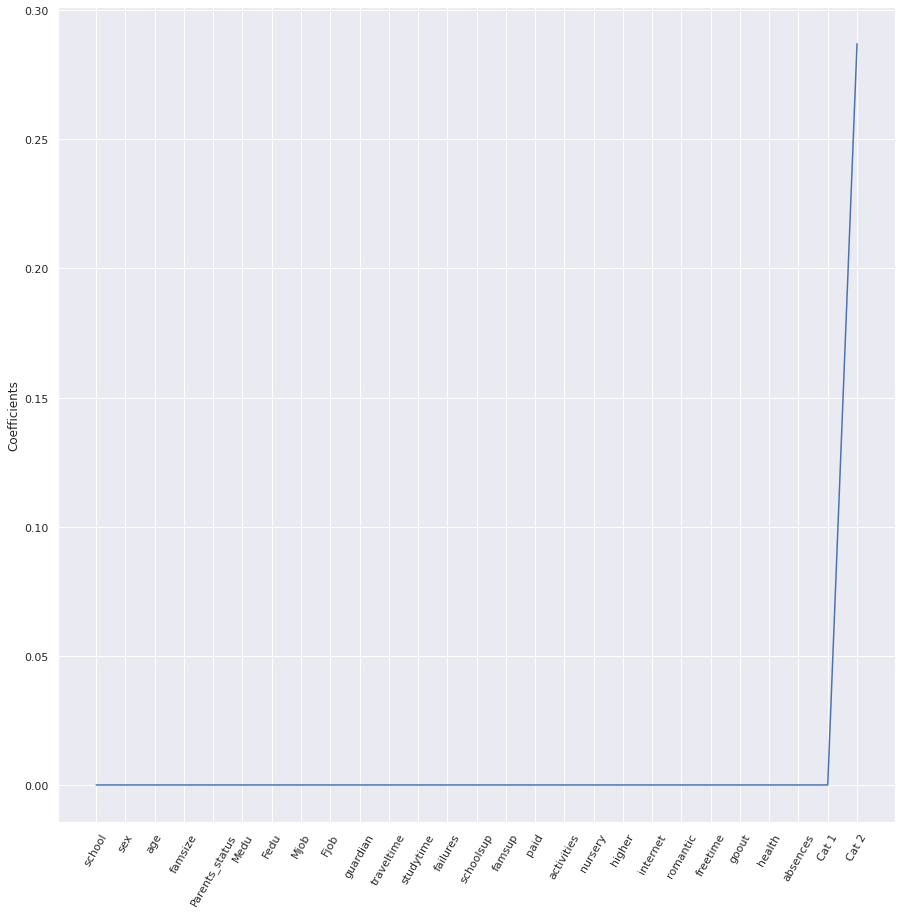

In [63]:
# Checking for the most important features
names = data.drop('Overall', axis=1).columns
lasso_coef = lasso.fit(X_scaled,y).coef_
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.xlabel
plt.show()